# Relationships

## Exploring relationships

Is scatter plot() slower than plot()?

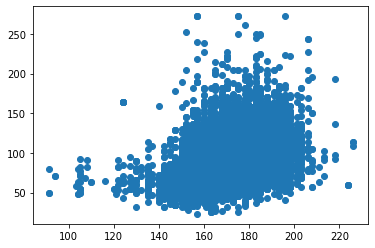

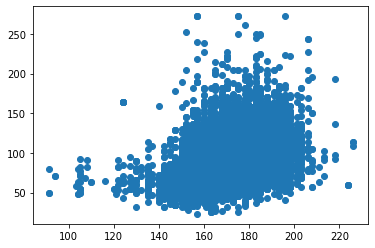

False


In [5]:
import time
import matplotlib.pyplot as plt
import pandas as pd
brfss = pd.read_hdf("brfss.hdf5")
h = brfss["HTM4"]
w = brfss["WTKG3"]

plot_start_time = time.time()
plt.plot(h, w, "o")
plot_end_time = time.time()
plt.show()

scatter_start_time = time.time()
plt.scatter(h,w)
scatter_end_time = time.time()
plt.show()

duration_plot = plot_end_time - plot_start_time
duration_scatter = scatter_end_time - scatter_start_time
print(duration_scatter > duration_plot)

Some data point can fall in discrete columns on the plot. To break up the columns
some random noise can be added. Adding random noise is called jittering.

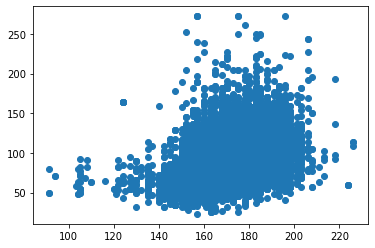

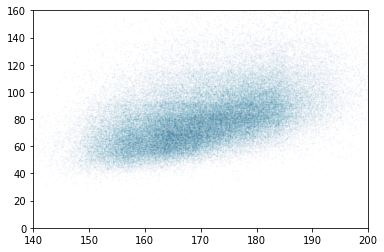

In [6]:
import numpy as np
plt.plot(h, w, "o")
plot_end_time = time.time()
plt.show()

h_jitter = h + np.random.normal(0, 2, size = len(brfss))
w_jitter = w + np.random.normal(0, 2, size = len(brfss))
plt.plot(h_jitter ,w_jitter, "o", markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

### PMF of age

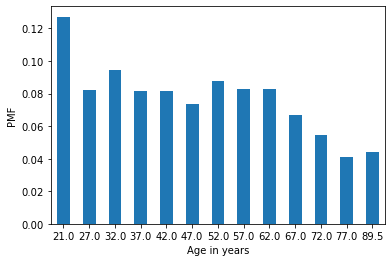

In [7]:
from empiricaldist import Pmf
import seaborn as sns
age = brfss["AGE"]
Pmf.from_seq(age).bar()
plt.xlabel("Age in years")
plt.ylabel("PMF")
plt.show()

### Scatter plot

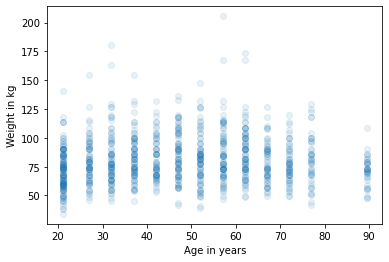

In [8]:
brfss = brfss[:1000]
age = brfss["AGE"]
weight = brfss["WTKG3"]
plt.plot(age, weight, "o", alpha=0.1)
plt.xlabel("Age in years")
plt.ylabel("Weight in kg")
plt.show()

### Jittering

The ages fall in columns because they've been rounded into 5-year bins. By jittering, the scatter plot will show the relationship more clearly.

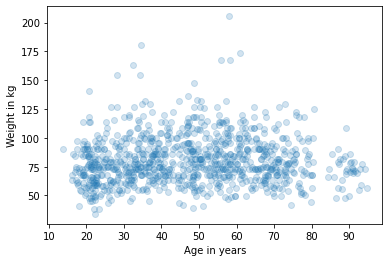

In [9]:
age = brfss["AGE"] + np.random.normal(0, 2.5, size=len(brfss))
plt.plot(age, weight, "o", alpha=0.2)
plt.xlabel("Age in years")
plt.ylabel("Weight in kg")
plt.show()

The nature of the realtionship is still hard to see.

## Visualizing relationships

Data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale.

### Height and weight

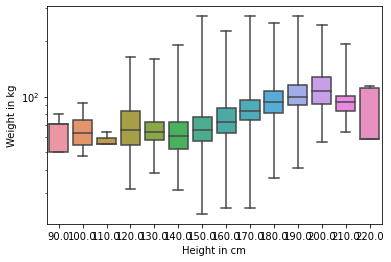

In [10]:
brfss = pd.read_hdf("brfss.hdf5")
data = brfss.dropna(subset=["_HTMG10", "WTKG3"])
sns.boxplot(x ="_HTMG10", y="WTKG3", data=data, whis=10)
plt.yscale("log")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()


### Distribution of income

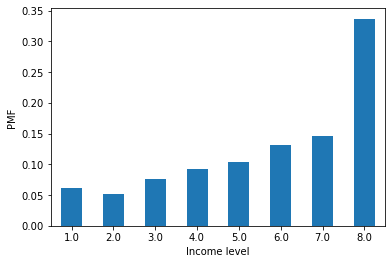

In [11]:
income = brfss["INCOME2"]
Pmf.from_seq(income).bar()
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

### Income and height

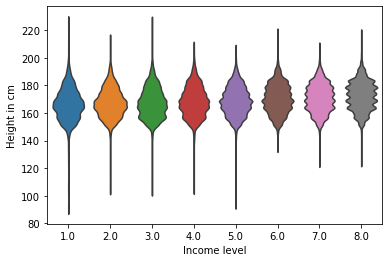

In [12]:
data = brfss.dropna(subset = ["INCOME2", "HTM4"])
sns.violinplot(x="INCOME2", y="HTM4", data=data, inner=None)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

Looks like there is a weak positive relationsip between income and height, at least for incomes below the median. Some ways are needed to quantify the strength of this relationship.



## Correlation

Correlation is the strength of the relationship between two variables.
Pearson's correlation coefficient is between -1 and 1 that quatifies the strength of a linear realtionship between variables.
Correlation only works for linear relationships.
When two variables are correlated that means we can use one to predict the other. And correlation says nothing about slope.

### Computing correlations

In [13]:
columns = ["AGE", "INCOME2", "_VEGESU1"]
subset = brfss[columns]
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


Correlation close to 0 does mean there is no relationship. There could be a nonlinear correlation.

## Simple regression

Linregress gives slope and rvalue (correlation). Strength of the effect is measured by the slope of the line. like correlation linearregression only measures the strength of a linear relationship.

### Income and vegetables

In [19]:
from scipy.stats import linregress
subset = brfss.dropna(subset=["INCOME2", "_VEGESU1"])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)


### Fit a line

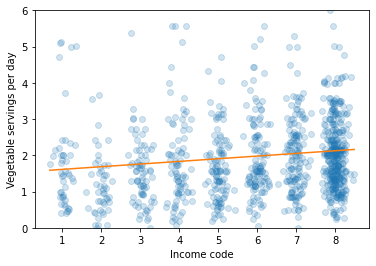

In [16]:
xs = xs[:1000]
ys = ys[:1000]
res = linregress(xs, ys)
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Fitting a line
fx = np.array([min(x_jitter), max(x_jitter)])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy)
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()
plt.show()